In [1]:
! mkdir histobayes_data

In [3]:
! ls inputs

train_data.pkl	val_data.pkl


In [4]:
import pandas as pd
d=pd.read_pickle("inputs/train_data.pkl")

In [18]:
len(d['y'])

89928

In [5]:
d.keys()

dict_keys(['X', 'y'])

In [7]:
d['X'][0].shape

(12, 10, 3)

In [10]:
import numpy as np
np.unique(d['y'])

array([0, 1, 2, 3, 4, 5, 6])

In [11]:
!mkdir histobayes_data_old

In [16]:
from PIL import Image
! ls histobayes_data_old

2_0.png


In [15]:
Image.fromarray(d['X'][0]).save(f"histobayes_data_old/{d['y'][0]}_0.png", "JPEG")

![a](histobayes_data_old/2_0.png)

In [22]:
pd.Series(d['y']).value_counts()

2    63315
5    11199
3     6114
4     3478
0     3192
6     2410
1      220
dtype: int64

0-aty
1-crys
2-debris
3-leuk
4-neg
5-RBC
6-sq

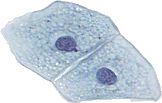

In [87]:
i=57
c=6
Image.fromarray(d['X'][np.where(pd.Series(d['y'])==c)[0][i]])

In [88]:
! mkdir histobayes_data/train histobayes_data/val histobayes_data/test

In [90]:
%%bash
for k in Leukocytes RBCs aty crystals neg squamous ; do for k2 in train val test; do mkdir histobayes_data/${k2}/${k} ; done ; done

In [93]:
assignment_dict={0:"aty",
                2:"crystals",
                3:"Leukocytes",
                4:"neg",
                5:"RBCs",
                6:"squamous"}

In [95]:
import tqdm
n_cells=200
c=6
for c in assignment_dict:
    idx=np.where(pd.Series(d['y']).isin([c]))[0]
    np.random.seed(42)
    np.random.shuffle(idx)
    train_idx=idx[:200]
    val_idx=idx[200:400]
    test_idx=idx[400:600]

    #for i,j in tqdm.tqdm(list(enumerate(train_idx))):#np.where(pd.Series(d['y'])==c)[0][i]
    #    Image.fromarray(d['X'][j]).save(f"histobayes_data/train/{assignment_dict[c]}/{d['y'][j]}_{i}.png", "PNG")
        
    for i,j in tqdm.tqdm(list(enumerate(val_idx))):#np.where(pd.Series(d['y'])==c)[0][i]
        Image.fromarray(d['X'][j]).save(f"histobayes_data/val/{assignment_dict[c]}/{d['y'][j]}_{i}.png", "PNG")
        
    for i,j in tqdm.tqdm(list(enumerate(test_idx))):#np.where(pd.Series(d['y'])==c)[0][i]
        Image.fromarray(d['X'][j]).save(f"histobayes_data/test/{assignment_dict[c]}/{d['y'][j]}_{i}.png", "PNG")

100%|██████████| 200/200 [00:03<00:00, 62.92it/s]


In [97]:
! rsync histobayes_data/* ../../../EDIT_Interns/users/glass/new_histobayes_data/ -r

/bin/sh: 1: rsync: not found


In [96]:
! ls 

jlevy
